In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
flights_data = pd.read_excel("/content/drive/MyDrive/FYP/Flights_Data.xlsx")

In [ ]:
# Remove spaces in column names
# source: https://stackoverflow.com/questions/41476150/remove-or-replace-spaces-in-column-names
flights_data.columns = flights_data.columns.str.replace(' ', '_')

In [ ]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967061 entries, 0 to 967060
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ECTRL_ID                    967061 non-null  int64         
 1   ADEP                        967061 non-null  object        
 2   ADEP_Latitude               965556 non-null  float64       
 3   ADEP_Longitude              965556 non-null  float64       
 4   ADES                        967061 non-null  object        
 5   ADES_Latitude               965483 non-null  float64       
 6   ADES_Longitude              965483 non-null  float64       
 7   FILED_OFF_BLOCK_TIME        967061 non-null  datetime64[ns]
 8   FILED_ARRIVAL_TIME          967061 non-null  datetime64[ns]
 9   ACTUAL_OFF_BLOCK_TIME       967061 non-null  datetime64[ns]
 10  ACTUAL_ARRIVAL_TIME         967061 non-null  datetime64[ns]
 11  AC_Type                     967061 non-

In [ ]:
# Descriptive Statistics of flights data for numerical columns
flights_data[['Actual_Distance_Flown_(nm)', 'Requested_FL']].describe()

,Actual_Distance_Flown_(nm),Requested_FL
count,967061.000000,966846.000000
mean,1013.586755,307.375464
std,1154.895376,75.715058
min,0.000000,0.000000
25%,320.000000,270.000000
50%,630.000000,330.000000
75%,1132.000000,360.000000
max,9360.000000,500.000000


In [ ]:
# Descriptive Statistics of flights data for some categorical columns
flights_data[['ADEP','ADES','AC_Type']].describe(include='object')

,ADEP,ADES,AC_Type
count,967061,967061,967061
unique,1530,1501,227
top,EDDF,EDDF,B738
freq,23171,23149,206857


In [ ]:
# Check for duplicated values
print(flights_data.duplicated().unique())

[False]


In [ ]:
# Check for missing values
flights_data.isnull().sum()

,0
ECTRL_ID,0
ADEP,0
ADEP_Latitude,1505
ADEP_Longitude,1505
ADES,0
ADES_Latitude,1578
ADES_Longitude,1578
FILED_OFF_BLOCK_TIME,0
FILED_ARRIVAL_TIME,0
ACTUAL_OFF_BLOCK_TIME,0


In [ ]:
# Proportion of missing values
flights_data.isna().sum()/len(flights_data)*100

,0
ECTRL_ID,0.000000
ADEP,0.000000
ADEP_Latitude,0.155626
ADEP_Longitude,0.155626
ADES,0.000000
ADES_Latitude,0.163175
ADES_Longitude,0.163175
FILED_OFF_BLOCK_TIME,0.000000
FILED_ARRIVAL_TIME,0.000000
ACTUAL_OFF_BLOCK_TIME,0.000000


In [ ]:
flights_data.dropna(subset=['ADEP_Latitude','ADEP_Longitude','ADES_Latitude','ADES_Longitude'])

,ECTRL_ID,ADEP,ADEP_Latitude,ADEP_Longitude,ADES,ADES_Latitude,ADES_Longitude,FILED_OFF_BLOCK_TIME,FILED_ARRIVAL_TIME,ACTUAL_OFF_BLOCK_TIME,ACTUAL_ARRIVAL_TIME,AC_Type,AC_Operator,AC_Registration,ICAO_Flight_Type,STATFOR_Market_Segment,Requested_FL,Actual_Distance_Flown_(nm)
0,233739450,KJFK,40.64028,-73.77833,LIRF,41.80028,12.23889,2019-09-01 00:00:00,2019-09-01 07:59:22,2019-08-31 23:45:00,2019-09-01 07:41:48,A333,DAL,N816NW,S,Traditional Scheduled,370.0,3797
1,233739451,LGAV,37.93667,23.94444,LEBL,41.29694,2.07833,2019-09-01 00:00:00,2019-09-01 02:46:11,2019-08-31 23:57:00,2019-09-01 02:48:11,A320,VLG,ECMJC,S,Lowcost,360.0,1084
2,233739452,LEIB,38.87278,1.37306,LEMD,40.47222,-3.56083,2019-09-01 00:00:00,2019-09-01 00:53:28,2019-09-01 00:09:00,2019-09-01 01:00:54,A320,VLG,ECMVE,S,Lowcost,290.0,254
3,233739453,EPKT,50.47417,19.08000,LEPA,39.55167,2.73889,2019-09-01 00:00:00,2019-09-01 02:36:52,2019-09-01 00:02:00,2019-09-01 02:42:09,B738,RYS,SPRSV,N,Charter,360.0,1011
4,233739454,KATL,33.63333,-84.43333,EGLL,51.47750,-0.46139,2019-09-01 00:00:00,2019-09-01 07:24:05,2019-09-01 00:12:00,2019-09-01 07:42:32,A333,VIR,GVLUV,S,Traditional Scheduled,370.0,3693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967056,234776627,OKBK,29.21667,47.96667,LTFM,41.27528,28.75194,2019-09-30 23:55:00,2019-10-01 03:32:41,2019-09-30 23:31:56,2019-10-01 03:20:00,A320,KKK,URAJD,S,Lowcost,360.0,1339
967057,234776628,HEGN,27.17861,33.80083,EDDL,51.28083,6.75722,2019-09-30 23:55:00,2019-10-01 04:42:13,2019-10-01 00:03:00,2019-10-01 04:52:10,A321,HES,LZHEA,N,Charter,320.0,1948
967058,234776629,KMCO,28.43333,-81.31667,EDDF,50.03333,8.57056,2019-09-30 23:59:00,2019-10-01 08:29:01,2019-10-01 00:30:00,2019-10-01 09:03:08,B744,DLH,DABVS,S,Traditional Scheduled,370.0,4198
967059,234776630,ULLI,59.80028,30.26250,DTMB,35.75806,10.75472,2019-09-30 23:59:00,2019-10-01 04:03:12,2019-10-01 00:12:00,2019-10-01 04:19:21,A320,TAR,TSIMM,S,Traditional Scheduled,340.0,1655


<Axes: title={'center': 'Top 10 Aircraft Type in Europe'}, xlabel='Aircraft Type', ylabel='Number of Flights'>

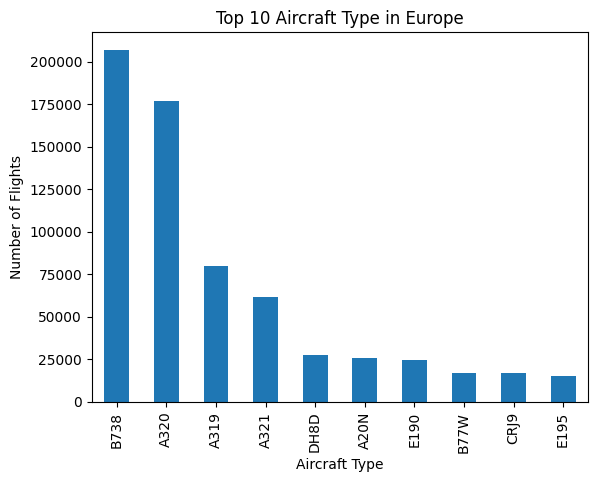

In [ ]:
#Top 10 Aircraft Type in Europe
flights_data['AC_Type'].value_counts()[:10].plot(kind='bar', xlabel='Aircraft Type', ylabel='Number of Flights', title='Top 10 Aircraft Type in Europe')

In [ ]:
# Top 20 Aircraft Operator in Europe
flights_data['AC_Operator'].value_counts()[:20]

,count
AC_Operator,
ZZZ,81990
RYR,73092
DLH,47427
THY,42540
AFR,33497
SAS,28376
EZY,27202
EWG,22566
KLM,21909


<Axes: title={'center': 'Top 15 Aircraft Operator in Europe'}, xlabel='Aircraft Operator', ylabel='Number of Flights'>

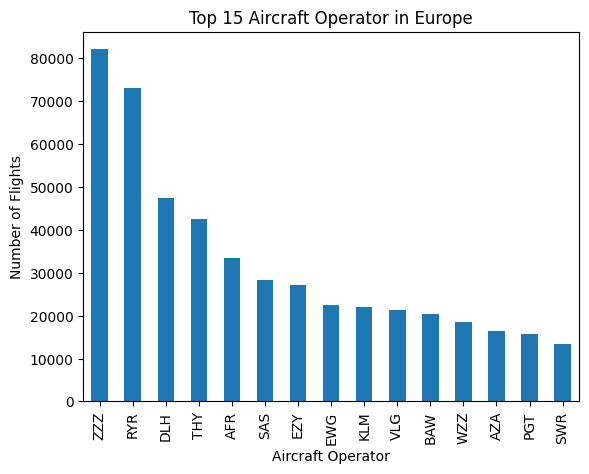

In [ ]:
# Top 15 Aircraft Operator in Europe
flights_data['AC_Operator'].value_counts()[:15].plot(kind='bar', xlabel='Aircraft Operator', ylabel='Number of Flights', title='Top 15 Aircraft Operator in Europe')

Source for ZZZ: https://www.faa.gov/air_traffic/publications/atpubs/fs_html/appendix_a.html
The above Aircraft Operator as per ICAO code are:
* ZZZ: Non ICAO Designator
* RYR: Ryanair
* DLH: Lufthansa
* THY: Turkish Airlines
* AFR: Air France
* SAS: Scandinavian Airlines System
* EZY: easyJet
* EWG: Eurowings
* KLM: KLM Royal Dutch Airlines
* VLG: Vueling Airlines
* BAW: British Airways
* WZZ: Wizz Air
* AZA: Alitalia
* PGT: Pegasus Airlines
* SWR: Swiss International Air Lines


In [ ]:
# Rename index of top 15 Aircraft Operator in Europe

top_15_ac_operator = flights_data['AC_Operator'].value_counts()[:15]

top_15_ac_operator = top_15_ac_operator.rename(index={'ZZZ': 'Non ICAO Designator'})
top_15_ac_operator = top_15_ac_operator.rename(index={'RYR': 'Ryanair'})
top_15_ac_operator = top_15_ac_operator.rename(index={'DLH': 'Lufthansa'})
top_15_ac_operator = top_15_ac_operator.rename(index={'THY': 'Turkish Airlines'})
top_15_ac_operator = top_15_ac_operator.rename(index={'AFR': 'Air France'})
top_15_ac_operator = top_15_ac_operator.rename(index={'AFR': 'Air France'})
top_15_ac_operator = top_15_ac_operator.rename(index={'SAS': 'Scandinavian Airlines System'})
top_15_ac_operator = top_15_ac_operator.rename(index={'EZY': 'easyJet'})
top_15_ac_operator = top_15_ac_operator.rename(index={'EWG': 'Eurowings'})
top_15_ac_operator = top_15_ac_operator.rename(index={'KLM': 'KLM Royal Dutch Airlines'})
top_15_ac_operator = top_15_ac_operator.rename(index={'VLG': 'Vueling Airlines'})
top_15_ac_operator = top_15_ac_operator.rename(index={'BAW': 'British Airways'})
top_15_ac_operator = top_15_ac_operator.rename(index={'WZZ': 'Wizz Air'})
top_15_ac_operator = top_15_ac_operator.rename(index={'AZA': 'Alitalia'})
top_15_ac_operator = top_15_ac_operator.rename(index={'PGT': 'Pegasus Airlines'})
top_15_ac_operator = top_15_ac_operator.rename(index={'SWR': 'Swiss International Air Lines'})

top_15_ac_operator

,count
AC_Operator,
Non ICAO Designator,81990
Ryanair,73092
Lufthansa,47427
Turkish Airlines,42540
Air France,33497
Scandinavian Airlines System,28376
easyJet,27202
Eurowings,22566
KLM Royal Dutch Airlines,21909


<Axes: title={'center': 'Top 15 Aircraft Operator in Europe'}, xlabel='Aircraft Operator', ylabel='Number of Flights'>

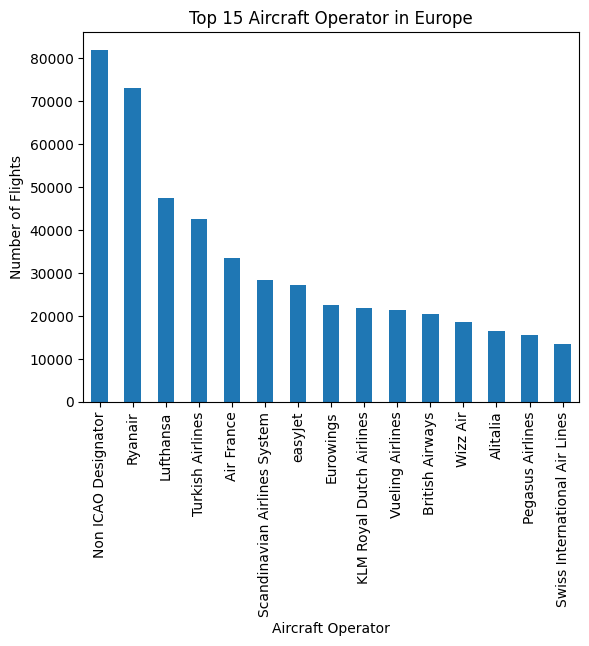

In [ ]:
# Top 15 Aircraft Operator in Europe with full airline names
top_15_ac_operator.plot(kind='bar', xlabel='Aircraft Operator', ylabel='Number of Flights', title='Top 15 Aircraft Operator in Europe')

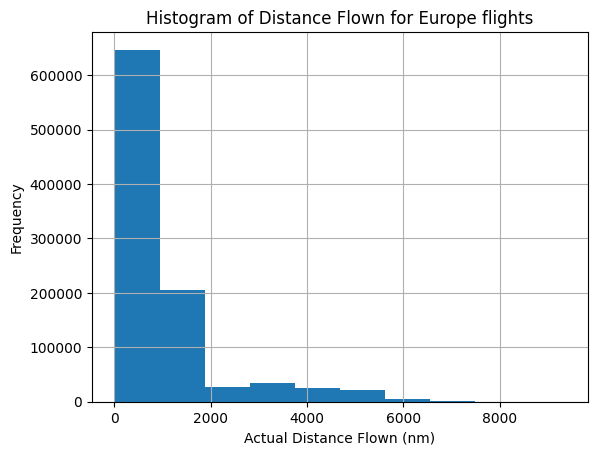

In [ ]:
# Histogram of Distance Flown for Europe flights
flights_data['Actual_Distance_Flown_(nm)'].hist()
plt.xlabel('Actual Distance Flown (nm)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance Flown for Europe flights')
plt.show()

In [ ]:
#source: https://www.avcodes.co.uk/icaonat.asp
uk_flights_data = flights_data[(flights_data['ADEP'].str[:2] == 'EG') | (flights_data['ADES'].str[:2] == 'EG')]

<Axes: title={'center': 'Top 10 Aircraft Type in UK'}, xlabel='Aircraft Type', ylabel='Number of Flights'>

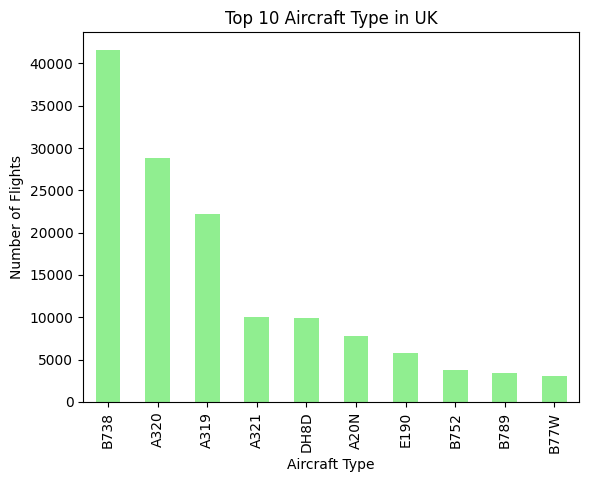

In [ ]:
# Top 10 Aircraft Type in UK
uk_flights_data['AC_Type'].value_counts()[:10].plot(kind='bar', xlabel='Aircraft Type', ylabel='Number of Flights', title='Top 10 Aircraft Type in UK', color='lightgreen')

<Axes: title={'center': 'Top 10 Aircraft Operator in UK'}, xlabel='Aircraft Operator', ylabel='Number of Flights'>

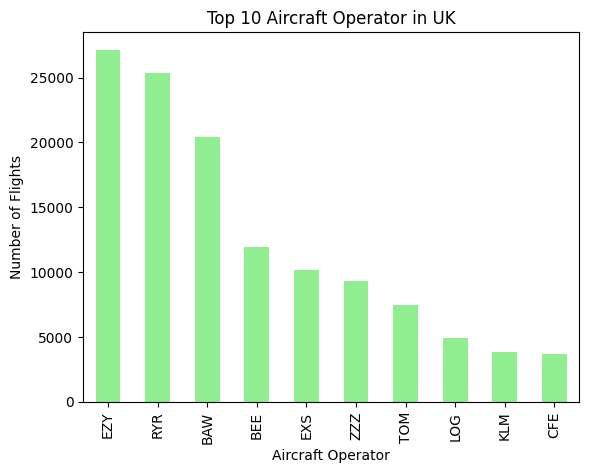

In [ ]:
# Top 10 Aircraft Operator in UK
uk_flights_data['AC_Operator'].value_counts()[:10].plot(kind='bar', xlabel='Aircraft Operator', ylabel='Number of Flights', title='Top 10 Aircraft Operator in UK', color='lightgreen')

In [ ]:
# Rename index for top 10 Aircraft Operator in UK
top_10_uk_ac_operator = uk_flights_data['AC_Operator'].value_counts()[:10]

top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'EZY': 'easyJet'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'RYR': 'Ryanair'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'BAW': 'British Airways'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'BEE': 'Flybe Limited'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'EXS': 'Jet2.com'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'ZZZ': 'Non ICAO Designator'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'TOM': 'TUI Airways Limited'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'LOG': 'Loganair'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'KLM': 'KLM Royal Dutch Airlines'})
top_10_uk_ac_operator = top_10_uk_ac_operator.rename(index={'CFE': 'BA CityFlyer'})

top_10_uk_ac_operator

,count
AC_Operator,
easyJet,27160
Ryanair,25377
British Airways,20420
Flybe Limited,11912
Jet2.com,10129
Non ICAO Designator,9327
TUI Airways Limited,7491
Loganair,4876
KLM Royal Dutch Airlines,3821


<Axes: title={'center': 'Top 10 Aircraft Operator in UK'}, xlabel='Aircraft Operator', ylabel='Number of Flights'>

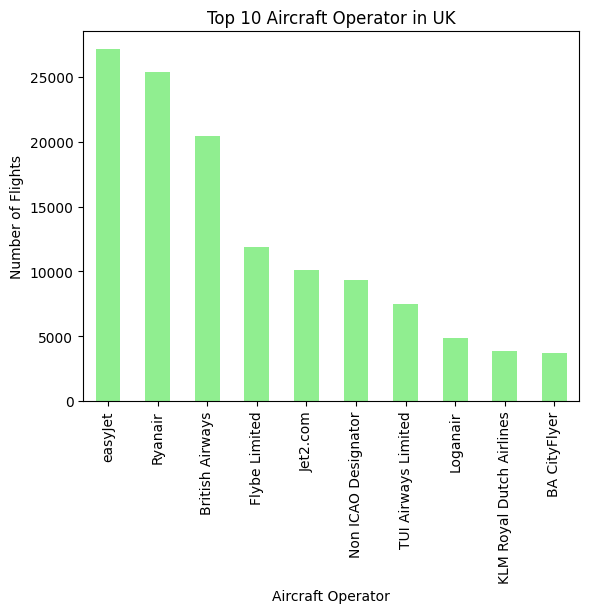

In [ ]:
# Top 10 Aircraft Operator in UK with full airline names
top_10_uk_ac_operator.plot(kind='bar', xlabel='Aircraft Operator', ylabel='Number of Flights', title='Top 10 Aircraft Operator in UK', color='lightgreen')

In [ ]:
BA_uk_flights = uk_flights_data[(uk_flights_data['AC_Operator'] == 'BAW') | (uk_flights_data['AC_Operator'] == 'CFE') |(uk_flights_data['AC_Operator'] == 'EFW')]

<Axes: title={'center': 'BA Top 10 Aircraft Type'}, xlabel='Aircraft Type', ylabel='Number of Flights'>

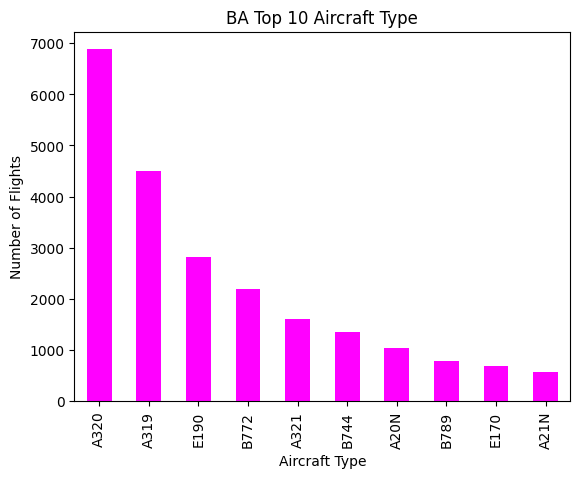

In [ ]:
# BA Top 10 Aircraft Type in UK
BA_uk_flights['AC_Type'].value_counts()[:10].plot(kind='bar', xlabel='Aircraft Type', ylabel='Number of Flights', title='BA Top 10 Aircraft Type', color='magenta')

<Axes: title={'center': 'BA Top 10 Aerodrome of Departure'}, xlabel='Aerodrome', ylabel='Number of Flights'>

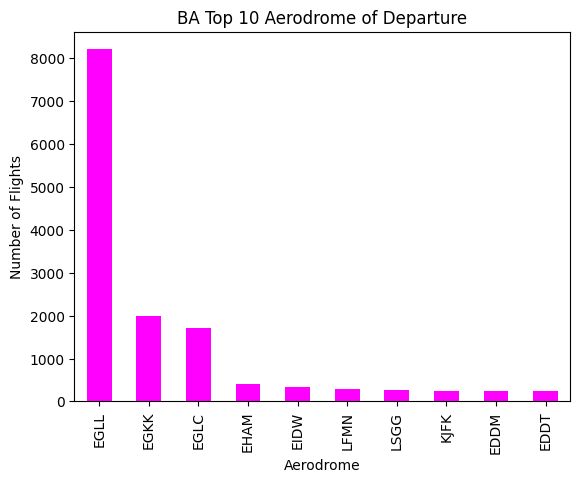

In [ ]:
# BA Top 10 Aerodrome of Departure in UK
BA_uk_flights['ADEP'].value_counts()[:10].plot(kind='bar', xlabel='Aerodrome', ylabel='Number of Flights', title='BA Top 10 Aerodrome of Departure', color='magenta')

<Axes: title={'center': 'BA Top 10 Aerodrome of Departure'}, xlabel='Aerodrome', ylabel='Number of Flights'>

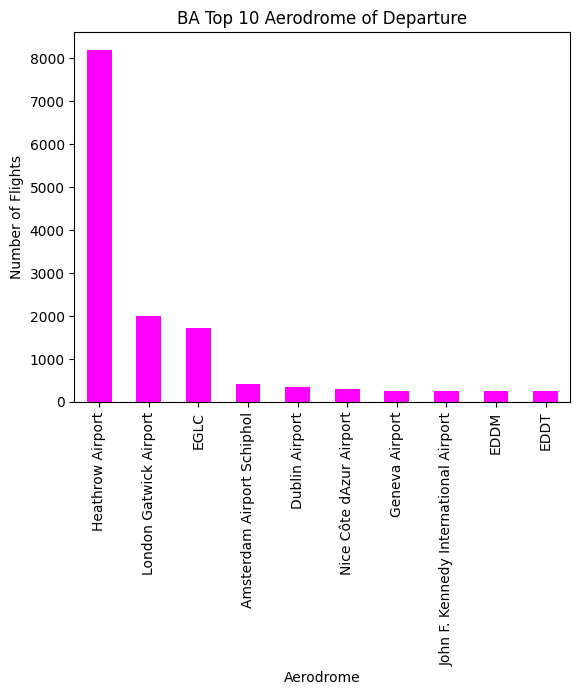

In [ ]:
# Rename index for BA Top 10 Aerodrome of Departure
top_10_BA_ADEP = BA_uk_flights['ADEP'].value_counts()[:10]

top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'EGLL': 'Heathrow Airport'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'EGKK': 'London Gatwick Airport'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'EHAM': 'Amsterdam Airport Schiphol'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'LFMN': 'Nice Côte d''Azur Airport'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'KJFK': 'John F. Kennedy International Airport'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'LEBL': 'Josep Tarradellas Barcelona-El Prat Airport'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'LSGG': 'Geneva Airport'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'EIDW': 'Dublin Airport'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'LIRF': 'Leonardo da Vinci International Airport'})
top_10_BA_ADEP = top_10_BA_ADEP.rename(index={'LFPG': 'Paris Charles de Gaulle Airport'})

# BA Top 10 Aerodrome of Departure with airport name
top_10_BA_ADEP.plot(kind='bar', xlabel='Aerodrome', ylabel='Number of Flights', title='BA Top 10 Aerodrome of Departure', color='magenta')

<Axes: title={'center': 'BA Top 10 Aerodrome of Destination'}, xlabel='Aerodrome', ylabel='Number of Flights'>

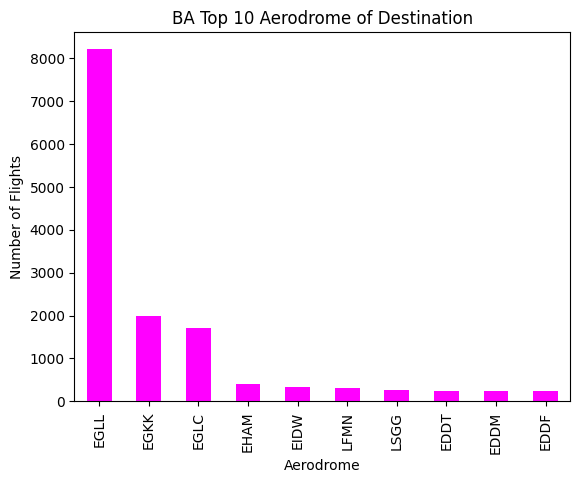

In [ ]:
# BA Top 10 Aerodrome of Destination
BA_uk_flights['ADES'].value_counts()[:10].plot(kind='bar', xlabel='Aerodrome', ylabel='Number of Flights', title='BA Top 10 Aerodrome of Destination', color='magenta')

<Axes: title={'center': 'BA Top 10 Aerodrome of Destination'}, xlabel='Aerodrome', ylabel='Number of Flights'>

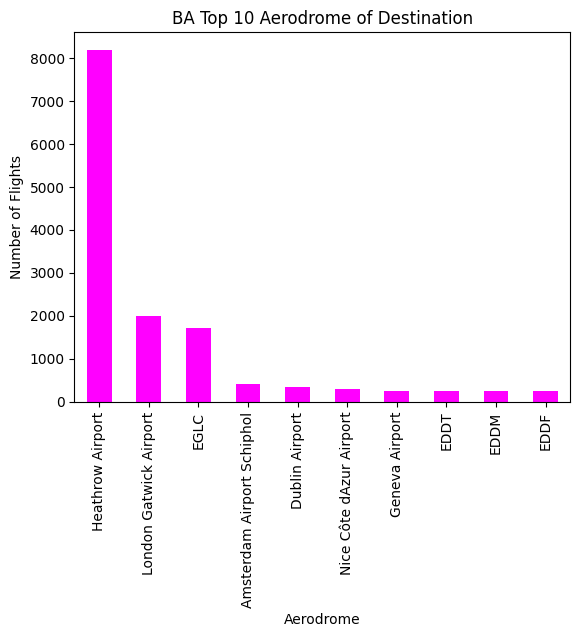

In [ ]:
# Reanme index for BA Top 10 Aerodrome of Destination
top_10_BA_ADES = BA_uk_flights['ADES'].value_counts()[:10]

top_10_BA_ADES = top_10_BA_ADES.rename(index={'EGLL': 'Heathrow Airport'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'EGKK': 'London Gatwick Airport'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'EHAM': 'Amsterdam Airport Schiphol'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'LFMN': 'Nice Côte d''Azur Airport'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'KJFK': 'John F. Kennedy International Airport'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'LEBL': 'Josep Tarradellas Barcelona-El Prat Airport'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'LSGG': 'Geneva Airport'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'EIDW': 'Dublin Airport'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'LIRF': 'Leonardo da Vinci International Airport'})
top_10_BA_ADES = top_10_BA_ADES.rename(index={'LFPG': 'Paris Charles de Gaulle Airport'})

# BA Top 10 Aerodrome of Destination with airport name
top_10_BA_ADES.plot(kind='bar', xlabel='Aerodrome', ylabel='Number of Flights', title='BA Top 10 Aerodrome of Destination', color='magenta')

In [ ]:
# Assuming df is your DataFrame and 'actual_off_block_time' is your datetime column
BA_uk_flights['ACTUAL_OFF_BLOCK_TIME'] = pd.to_datetime(BA_uk_flights['ACTUAL_OFF_BLOCK_TIME'], format='%d/%m/%Y %H:%M')

# Filter for flights on 1st September 2019
BA_uk_flights_01_Sept = BA_uk_flights[BA_uk_flights['ACTUAL_OFF_BLOCK_TIME'].dt.date == pd.to_datetime('2019-09-01').date()]

<ipython-input-29-879be89187bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BA_uk_flights['ACTUAL_OFF_BLOCK_TIME'] = pd.to_datetime(BA_uk_flights['ACTUAL_OFF_BLOCK_TIME'], format='%d/%m/%Y %H:%M')


In [ ]:
#https://tfl.gov.uk/travel-information/visiting-london/getting-to-london/london-airports (Heathrow Airport, Gatwick Airport, Stansted Airport, Luton Airport, London City Airport, Southend Airport)
london_airports = ['EGLL', 'EGKK', 'EGSS', 'EGGW', 'EGLC', 'EGMC']
BA_london_flights_01_Sept = BA_uk_flights_01_Sept[(BA_uk_flights_01_Sept['ADEP'].isin(london_airports)) | (BA_uk_flights_01_Sept['ADES'].isin(london_airports))]

<Axes: title={'center': 'BA Top 10 Aircraft Type in London'}, xlabel='Aircraft Type', ylabel='Number of Flights'>

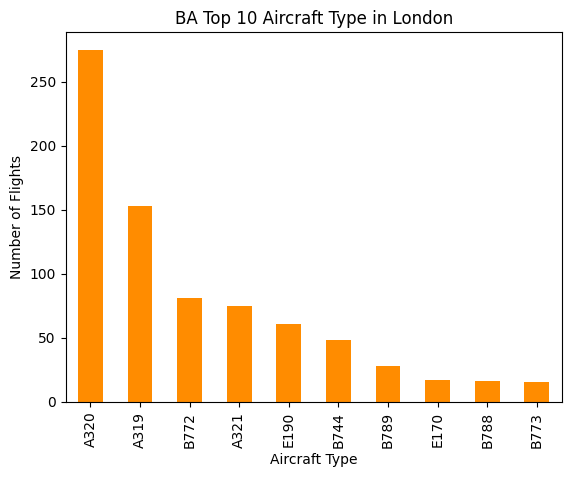

In [ ]:
# BA Top 10 Aircraft Type in London
BA_london_flights_01_Sept['AC_Type'].value_counts()[:10].plot(kind='bar', xlabel='Aircraft Type', ylabel='Number of Flights', title='BA Top 10 Aircraft Type in London', color='darkorange')

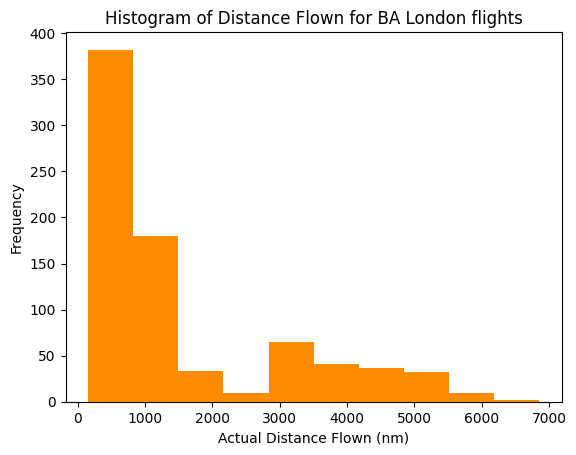

In [ ]:
# Histogram of Distance Flown for BA London flights
plt.hist(BA_london_flights_01_Sept['Actual_Distance_Flown_(nm)'], color = "darkorange")
plt.xlabel('Actual Distance Flown (nm)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance Flown for BA London flights')
plt.show()

In [ ]:
flights_AC_type = BA_london_flights_01_Sept['AC_Type'].unique()
print(flights_AC_type)

['B788' 'B772' 'B77W' 'A319' 'B744' 'B789' 'A388' 'A320' 'A20N' 'A321'
 'A332' 'E190' 'A21N' 'A343' 'A318' 'E170' 'SB20']


In [ ]:
BA_fleet_AC_type = ['A318', 'A319', 'A320', 'A321', 'A339', 'A35K', 'A388', 'B744', 'B772', 'B773', 'B779', 'B788', 'B789', 'B78X', 'SB20', 'E170', 'E190']

In [ ]:
AC_type_discrepencies = set(flights_AC_type) - set(BA_fleet_AC_type)
print(AC_type_discrepencies)

{'A21N', 'A20N', 'A332', 'A343', 'B77W'}


In [ ]:
BA_london_flights_01_Sept['AC_Type'] = BA_london_flights_01_Sept['AC_Type'].replace({'A20N': 'A320'})
BA_london_flights_01_Sept['AC_Type'] = BA_london_flights_01_Sept['AC_Type'].replace({'A21N': 'A321'})
BA_london_flights_01_Sept['AC_Type'] = BA_london_flights_01_Sept['AC_Type'].replace({'B77W': 'B773'})
BA_london_flights_01_Sept['AC_Type'] = BA_london_flights_01_Sept['AC_Type'].replace({'A343': 'A321'})
BA_london_flights_01_Sept['AC_Type'] = BA_london_flights_01_Sept['AC_Type'].replace({'A332': 'A339'})

print(set(BA_london_flights_01_Sept['AC_Type'].unique()) - set(BA_fleet_AC_type))

set()


<ipython-input-36-f3c9959e2864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BA_london_flights_01_Sept['AC_Type'] = BA_london_flights_01_Sept['AC_Type'].replace({'A20N': 'A320'})
<ipython-input-36-f3c9959e2864>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BA_london_flights_01_Sept['AC_Type'] = BA_london_flights_01_Sept['AC_Type'].replace({'A21N': 'A321'})
<ipython-input-36-f3c9959e2864>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
#Passenger dataset
passenger_data = pd.read_csv("/content/drive/MyDrive/FYP/gb_pax_traffic.csv")

In [ ]:
#Airport codes dataset
airport_codes = pd.read_excel("/content/drive/MyDrive/FYP/Airport codes IATA-ICAO.xlsx")

In [ ]:
#Dictionary for IATA code to ICAO code
IATA_to_ICAO = airport_codes.set_index('IATA')['ICAO'].to_dict()

In [ ]:
#Add ICAO codes to airports in passenger dataset
# Map Origin Airport
passenger_data['Origin_Airport_ICAO'] = passenger_data['Origin Airport'].map(IATA_to_ICAO)

# Map Destination Airport
passenger_data['Destination_Airport_ICAO'] = passenger_data['Destination Airport'].map(IATA_to_ICAO)

#filter for London
passenger_data_london = passenger_data[(passenger_data['Origin_Airport_ICAO'].isin(london_airports)) | (passenger_data['Destination_Airport_ICAO'].isin(london_airports))]

#filter for direct flights
passenger_london_direct = passenger_data_london[passenger_data_london['Itinerary'] == 'NON-STOP']


In [ ]:
#Save flights data to excel for aircraft frequency count
flights_data['ADEP-ADES'] = uk_flights_data['ADEP'] + '-' + uk_flights_data['ADES']

# Save to Excel
flights_data.to_excel('uk_flights_data.xlsx', index=False)

In [ ]:
#read flights aircraft type count
flights_ac_type_count = pd.read_excel("/content/drive/MyDrive/FYP/flights_data_ac_type.xlsx")

In [ ]:
#Dictionary for aircraft type used for Departure and Destination
ADEP_ADES_ac_type = flights_ac_type_count.set_index('ADEP-ADES')['AC Type'].to_dict()

In [ ]:
#Add aircraft type to passanger data
passenger_london_direct['Origin_Destination_ICAO'] = passenger_london_direct['Origin_Airport_ICAO'] + '-' + passenger_london_direct['Destination_Airport_ICAO']
passenger_london_direct['AC_Type'] = passenger_london_direct['Origin_Destination_ICAO'].map(ADEP_ADES_ac_type)

<ipython-input-44-a89ebc16f335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_london_direct['Origin_Destination_ICAO'] = passenger_london_direct['Origin_Airport_ICAO'] + '-' + passenger_london_direct['Destination_Airport_ICAO']
<ipython-input-44-a89ebc16f335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_london_direct['AC_Type'] = passenger_london_direct['Origin_Destination_ICAO'].map(ADEP_ADES_ac_type)


In [ ]:
#Check for mismatch in aircraft type matching to passenger demand as per flight route
passenger_london_direct['AC_Type'].isna().sum()/len(passenger_london_direct)*100

np.float64(15.233949945593036)

In [ ]:
#remove mismatch routes
passenger_london_direct = passenger_london_direct.dropna(subset=['AC_Type'])

In [ ]:
#Descriptive Statistics of PPDEW
passenger_london_direct['PPDEW'].describe()

,PPDEW
count,1558.000000
mean,250.972850
std,294.953099
min,0.000000
25%,64.600000
50%,153.250000
75%,312.175000
max,2889.100000


In [ ]:
#Descriptive analysis for categorical columns
passenger_london_direct[['Origin Airport','Origin Airport Name','Destination Airport','Destination Airport Name']].describe()

,Origin Airport,Origin Airport Name,Destination Airport,Destination Airport Name
count,1558,1558,1558,1558
unique,381,381,385,385
top,LHR,HEATHROW AIRPORT,LHR,HEATHROW AIRPORT
freq,205,205,202,202


<Axes: title={'center': 'Top 10 Origin Countries'}, xlabel='Country', ylabel='Number of Itinenaries'>

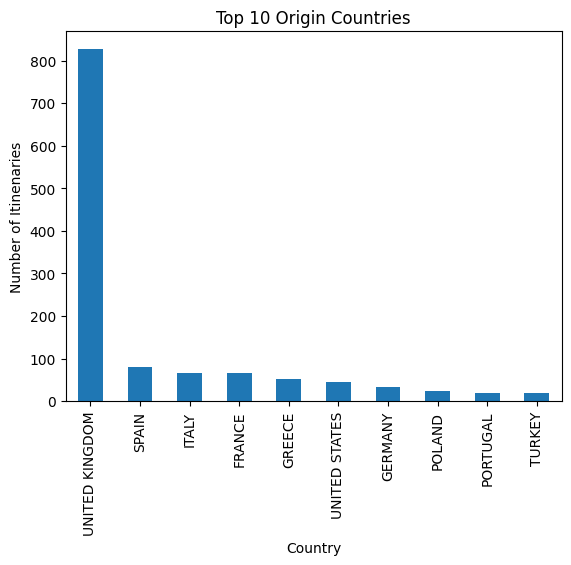

In [ ]:
#Top 10 Origin Countries
passenger_london_direct['Origin Country Name'].value_counts()[:10].plot(kind='bar', xlabel='Country', ylabel='Number of Itinenaries', title='Top 10 Origin Countries')

<Axes: title={'center': 'Top 10 Destination Countries'}, xlabel='Country', ylabel='Number of Itinenaries'>

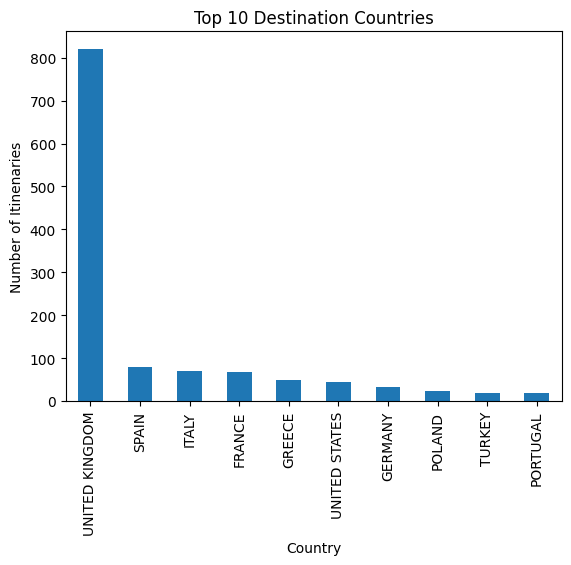

In [ ]:
#Top 10 Destination Countries
passenger_london_direct['Destination Country Name'].value_counts()[:10].plot(kind='bar', xlabel='Country', ylabel='Number of Itinenaries', title='Top 10 Destination Countries')

<Axes: title={'center': 'Top 10 Aircraft Type'}, xlabel='Country', ylabel='Number of Itinenaries'>

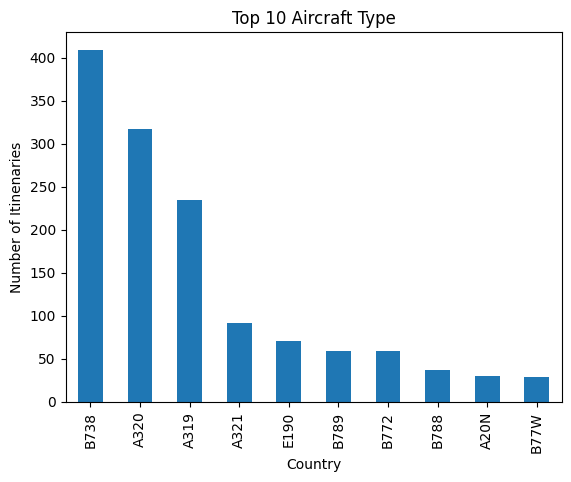

In [ ]:
#Top 10 AC Type mapped
passenger_london_direct['AC_Type'].value_counts()[:10].plot(kind='bar', xlabel='Country', ylabel='Number of Itinenaries', title='Top 10 Aircraft Type')